In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print ('OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):')
print (cv2.__version__)

OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):
4.1.1


In [7]:
octo_front = cv2.imread(r'C:\Users\Tianh\Desktop\Octo_front.jpg')
octo_offset = cv2.imread(r'C:\Users\Tianh\Desktop\Octo_offset.jpg')

def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

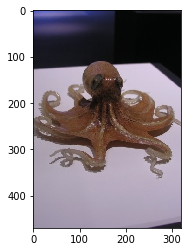

In [8]:
show_rgb_img(octo_front);

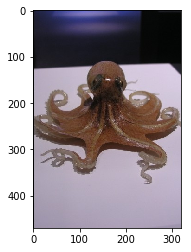

In [9]:
show_rgb_img(octo_offset);

# 2、生成sift功能

## （1）将图像转换为灰度

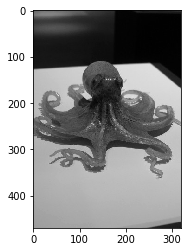

In [10]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

octo_front_gray = to_gray(octo_front)
octo_offset_gray = to_gray(octo_offset)

plt.imshow(octo_front_gray, cmap='gray');

In [11]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# generate SIFT keypoints and descriptors
octo_front_kp, octo_front_desc = gen_sift_features(octo_front_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

print ('Here are what our SIFT features look like for the front-view octopus image:')
show_sift_features(octo_front_gray, octo_front, octo_front_kp);

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [ ]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);